In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

In [53]:
import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df = gpd.read_file('Beijing.kml', driver='KML')

In [139]:
from shapely.geometry import Point
import geopandas as gpd
import random

######
def random_points_in_polygon(number, polygon, seed=10):
    random.seed(seed)
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point
######

# geodata = gpd.read_file("path/to/your/file.shp")

# generate 5 points within the first county polygon in geodata
points = random_points_in_polygon(100, df.iloc[0].geometry)

# Coordinates of the first point
BJ_x = [point.x for point in points]
BJ_y = [point.y for point in points]

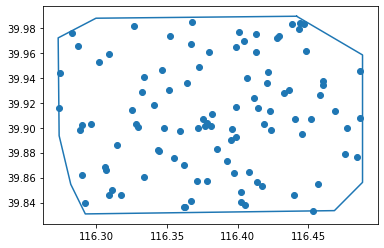

In [140]:
plt.plot(*df.iloc[0,2].exterior.xy)
plt.scatter(BJ_x, BJ_y)